<h1>Studienarbeit: Predictive Analytics</h1>
<b>Personen:</b> Luise Fabich / Vinh-Phnong Nguyen / Marc Willberg

<h2>Vorhersage des Trinkgelds der gelben Taxis in New York anhand von verschiedenen Faktoren:</h2>
Ziel ist es, ein Modell zu entwickeln, das die zu erwartenden Trinkgelder auf der Grundlage verschiedener Faktoren wie <b>Fahrtdauer, Tag, Tageszeit, Wochentag, Passagieranzahl, Fahrtdistanz, Start- & Zielort und den angezeigten Betrag des Taximeters </b> vorhersagt. <br> 
Zukünftig könnten noch <b>Wetterdaten, Feirtage und Events</b> mit einfließen. <br>
Die Datenbasis bildet hierbei die Taxifahrten der gelben Taxis in New York aus dem Jahr 2023.

<h1>Benötigte Packete: </h1>

pip install pandas<br>
pip install numpy<br>
pip install matplotlib<br>
pip install scikit-learn<br>
pip install ipython<br>
pip install seaborn<br>

<h1>Laden Der Packete:</h1>

Hier befinden sich alle Packete die einbunden werden müssen.

In [29]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
from IPython.display import display
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta, date
import calendar
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

<h1>Laden der Datensätze:</h1>
<p>Die zu analysierenden Daten sind unter der folgenden Webseite zu finden:</p>
<p>Page: <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">TLC Trip Record Data</a></p>

In [5]:
year = 2023
path = f'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY'
year_directory = os.path.join(path, f'{year}')

print("Folgende Daten wurden gefunden:")
parquet_files = [os.path.join(year_directory, file) for file in os.listdir(year_directory) if file.endswith('.parquet')]
for file in parquet_files:
    print(file)

Folgende Daten wurden gefunden:
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-01.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-02.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-03.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-04.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-05.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-06.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-07.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-08.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_T


<h2>Einsicht auf Rohdaten:</h2>
<p>Für einen Einblick der Rohdaten werden aus der ersten Datei die ersten 5 Spalten geladen.</p>
<p>Erklärung der Datensätze: <a href="https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf" target="_blank">Data Dictionary – Yellow Taxi Trip Records</a></p>



In [6]:
first_file = parquet_files[0]
df = pd.read_parquet(first_file)
df_head = df.iloc[:5, :].T #Anzeigen ersten 5 Spalten
display(df_head)

,0,1,2,3,4
VendorID,2,2,2,1,2
tpep_pickup_datetime,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04,2023-01-01 00:03:48,2023-01-01 00:10:29
tpep_dropoff_datetime,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49,2023-01-01 00:13:25,2023-01-01 00:21:19
passenger_count,1.0,1.0,1.0,0.0,1.0
trip_distance,0.97,1.1,2.51,1.9,1.43
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,161,43,48,138,107
DOLocationID,141,237,238,7,79
payment_type,2,1,1,1,1


<h2>Größe der Datensätze:</h2>
Um einen ersten Überblick über die relevanten Größen zu erhalten, werden die Datengrößen zunächst analysiert. Um einen groben Eindruck zu erhalten wird hierfür der <b>Mai des Jahres 2023</b> betrachtet.
Es wird erkenntlich das pro Monat ca. 3 Millionen Fahrten gemacht werden. Dies entspricht ca. 100.000 Fahrten pro Tag.

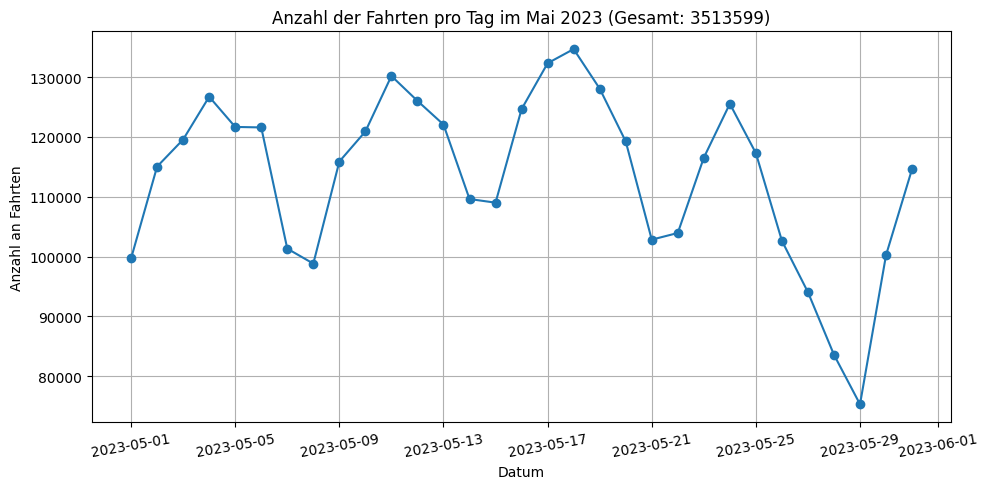

In [7]:
# Laden der Fahrten je Tage
def counts_day_trips_for_month(data, year, month):
    start_date = date(year, month, 1)
    end_date = date(year, month, calendar.monthrange(year, month)[1])
    data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.date #Extrahiere nur das Datum
    count_list = []

    # Aufteilung in Tagen
    for current_date in pd.date_range(start_date, end_date):
        count = (data['tpep_pickup_datetime'] == current_date.date()).sum()
        count_list.append((current_date.date(), count))
    return count_list

month = 5
year = 2023
path = 'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY\\2023\\yellow_tripdata_2023-05.parquet'
data = pd.read_parquet(path)
list_day_trips = counts_day_trips_for_month(data, year, month)
total_trips = sum(i[1] for i in list_day_trips) # Gesamtanzahl der Fahrten

# Anzeigen Diagram
x_data = [i[0] for i in list_day_trips]
y_data = [i[1] for i in list_day_trips]
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.title(f'Anzahl der Fahrten pro Tag im Mai 2023 (Gesamt: {total_trips})')
plt.xlabel('Datum')
plt.ylabel('Anzahl an Fahrten')
plt.grid(True)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


<h2>Vorbereitung der Daten:</h2>
Zunächst werden die Daten vorbereitet um Algorithmen auf diesen anzuwenden.

In [9]:
class TaxiTripFeatures:
    def __init__(self, travel_time,start_month, start_day, start_hour, weekday, passenger_count, trip_distance, PULocationID, DOLocationID, tip_amount, total_amount_without_tip):
        self.travel_time = travel_time                           #Fahrtzeit in Sekunden
        self.start_day = start_day                               #Tag in dem das Taxi gestartet hat
        self.start_hour = start_hour                             #Stunde in dem das Taxi gestartet hat
        self.weekday = weekday                                   #Wochentag als int in dem das Taxi gestartet hat
        self.passenger_count = passenger_count                   #Anzahl der Passagiere
        self.trip_distance = trip_distance                       #Fahrtdistanz in Meilen 
        self.PULocationID = PULocationID                         #StartID Standort
        self.DOLocationID = DOLocationID                         #ZielID Standort
        self.tip_amount = tip_amount                             #Trinkgeld
        self.total_amount_without_tip = total_amount_without_tip #Gesamtbetrag ohne Trinkgeld

    def __repr__(self):
        return (f"TaxiTripFeatures(travel_time={self.travel_time}, start_day={self.start_day}, "
                f"start_hour={self.start_hour}, weekday={self.weekday}, passenger_count={self.passenger_count}, "
                f"trip_distance={self.trip_distance}, PULocationID={self.PULocationID}, DOLocationID={self.DOLocationID}, "
                f"tip_amount={self.tip_amount}, total_amount_without_tip={self.total_amount_without_tip})")

<h2>Analyse der Datengröße:</h2>

<h3>Laden der gesamten Daten:</h3>
Um eine gute Stichprobe der Datensätze zu ermitteln werden zunächst alle Datensätze benötigt. Hierzu ist zu beachten das nur Datensätze geladen werden die nicht leer sind und wo mit Kreditkarte gezahlt wurde. Dies hat den Grund da bei Bahrzahlung das Trinkgeld nicht angegeben wurde.

In [10]:
def load_features_from_file(file_path):
    data = pd.read_parquet(file_path, engine='auto')  
    data = data[data['payment_type'] == 1].dropna() #Nur Kreditkartenzahlung
    data = data.dropna() #Löschen von leeren Zeilen
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime']) #Konvertiert in Datumsformat
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime']) #Konvertiert in Datumsformat 
    return [
        TaxiTripFeatures(
            (row['tpep_dropoff_datetime'] - row['tpep_pickup_datetime']).total_seconds(),
            row['tpep_pickup_datetime'].month,
            row['tpep_pickup_datetime'].day,
            row['tpep_pickup_datetime'].hour,
            row['tpep_pickup_datetime'].weekday(),
            row['passenger_count'],
            row['trip_distance'],
            row['PULocationID'],
            row['DOLocationID'],
            row['tip_amount'],
            row['total_amount'] - row['tip_amount']
        ) for _, row in data.iterrows()
    ]

random_file = random.choice(parquet_files) # Auswahl zufällige Datei
print(f"Zufällig ausgewählte Datei: {random_file}")

start_time = time.time()
features_list = load_features_from_file(random_file)
end_time = time.time()

print(f"Anzahl Datensätze: {len(features_list)}")
print(f"Benötigte Zeit: {end_time - start_time} seconds.")


Zufällig ausgewählte Datei: C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-06.parquet
Anzahl Datensätze: 2592256
Benötigte Zeit: 227.04202270507812 seconds.


<h3>Festlegung der Strichprobe:</h3>
Für die nächsten Schritte wird aus dem Jahr 2023 ein Monatsdatensatz als Stichprobe verwendet. Dies ermöglicht es, effizient Muster und Trends zu analysieren, ohne das gesamte Jahr betrachten zu müssen. Ein einzelner Monat bietet ausreichend Daten, um eine gute Aussage im Vergleich zu anderen Monaten zu treffen. Als Stichprobe betrachten wir 7% der Daten. Dies sollte pro Monat eine Stichprobengröße von ca. 200.000 Datensätzen ergeben.


In [13]:
sample_percentage = 0.07
sampled_data_list = []
data = pd.DataFrame([vars(feature) for feature in features_list])
grouped = data.groupby('start_day')
for _, group in grouped:
    sample_size = int(len(group) * sample_percentage)  # Anzahl an Daten pro Tag
    sampled_group = group.sample(n=sample_size)  # Zieht zufällige Werte
    sampled_data_list.append(sampled_group)
sampled_data = pd.concat(sampled_data_list, ignore_index=True) # Ingore_Index= datum Index gelöscht wird / Fügt Stichprobe zusammen

print(f"Anzahl der Stichprobendatensätze: {len(sampled_data)}")
df_head = sampled_data.head(5).T  # Anzeigen der ersten 5 Zeilen
display(df_head)

Anzahl der Stichprobendatensätze: 181442


,0,1,2,3,4
travel_time,363.00,379.00,662.00,242.00,1044.00
start_day,1.00,1.00,1.00,1.00,1.00
start_hour,12.00,8.00,0.00,14.00,18.00
weekday,3.00,3.00,3.00,3.00,3.00
passenger_count,1.00,4.00,1.00,1.00,1.00
trip_distance,1.20,0.85,2.31,0.38,1.70
PULocationID,230.00,238.00,166.00,87.00,163.00
DOLocationID,143.00,238.00,263.00,88.00,170.00
tip_amount,3.10,2.38,0.78,2.45,2.00
total_amount_without_tip,12.60,11.90,10.16,9.80,21.40


<h3>Vergleich statistische Daten:</h3>
Die Gesamtdaten werden mit den Stattischen Daten vergleichen.

In [14]:
print("Gesamtdaten:")
features_df = pd.DataFrame([vars(feature) for feature in features_list])
pd.set_option('display.float_format', '{:.2f}'.format)
features_df.describe()

Gesamtdaten:


,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
count,2592256.00,2592256.00,2592256.00,2592256.00,2592256.00,2592256.00,2592256.00,2592256.00,2592256.00,2592256.00
mean,1057.13,15.10,14.34,3.00,1.36,3.67,165.80,165.04,4.45,25.83
std,2350.69,8.61,5.94,1.87,0.88,33.49,63.63,69.78,4.26,20.49
min,-3896.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,-84.00,-83.10
25%,471.00,8.00,11.00,1.00,1.00,1.10,132.00,114.00,2.20,14.30
50%,770.00,15.00,15.00,3.00,1.00,1.84,162.00,162.00,3.30,18.60
75%,1249.00,22.00,19.00,4.00,1.00,3.50,234.00,234.00,5.00,27.30
max,86391.00,31.00,23.00,6.00,9.00,15165.97,265.00,265.00,711.88,1033.30


In [15]:
print("Stichprobe:")
pd.set_option('display.float_format', '{:.2f}'.format)
sampled_data.describe()

Stichprobe:


,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
count,181442.00,181442.00,181442.00,181442.00,181442.00,181442.00,181442.00,181442.00,181442.00,181442.00
mean,1057.80,15.10,14.33,3.00,1.35,3.88,165.99,164.96,4.45,25.80
std,2372.49,8.61,5.92,1.87,0.88,55.81,63.57,69.77,4.27,20.51
min,-1091.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,-45.04,-24.20
25%,471.00,8.00,11.00,1.00,1.00,1.10,132.00,114.00,2.20,14.30
50%,769.00,15.00,15.00,3.00,1.00,1.84,162.00,162.00,3.30,18.60
75%,1249.00,22.00,19.00,4.00,1.00,3.49,234.00,234.00,5.00,27.00
max,86343.00,31.00,23.00,6.00,8.00,9683.79,265.00,265.00,220.00,537.05


<h3>Vergleich grafischer Daten:</h3> 
Gucken wir uns die Kontinurierlichen Daten <b>"travel_time"</b>, <b>"trip_distance"</b>, <b>"tip_amount"</b> und <b>"total_amount_without_tip"</b>.


Stichprobe wird auf Varianz und Divesität geprüft. Dies ist notwendig um Sicherzustellen ob die Stichprobe die gesamten Datenmengen gut abbildet.

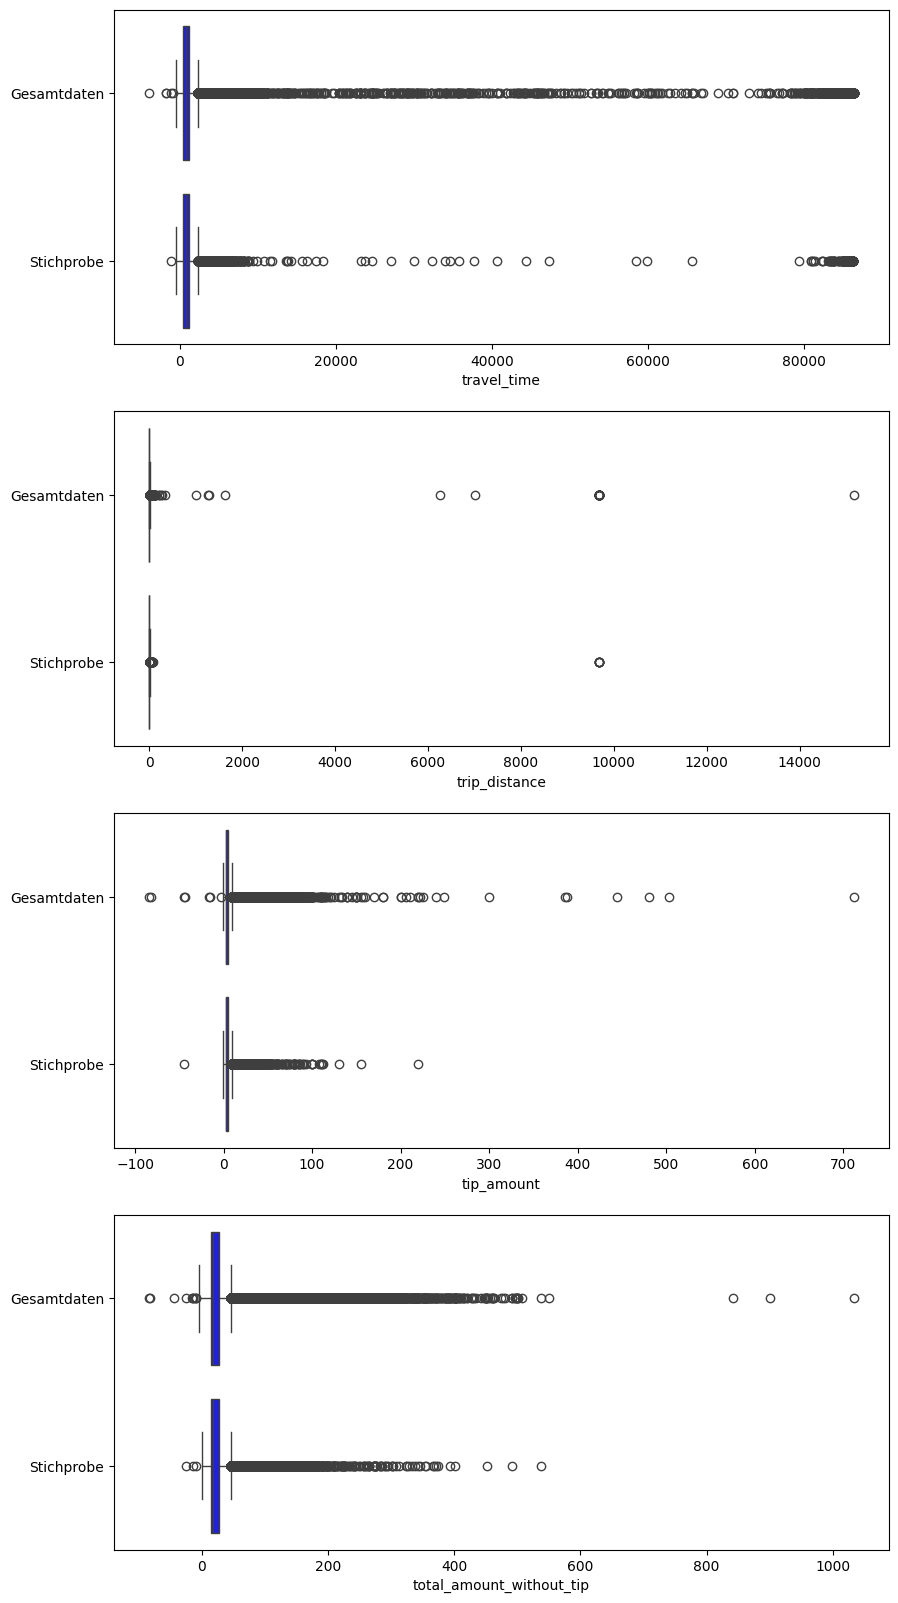

In [16]:
features = ['travel_time', 'trip_distance', 'tip_amount', 'total_amount_without_tip']

# Anzahl der benötigten Reihen
rows = len(features)
_, axes = plt.subplots(rows, 1, figsize=(10, 5 * rows))

#Erstellen von Boxplots
for i, feature in enumerate(features):
    combined_data = pd.concat([data[feature], sampled_data[feature]], axis=1)
    combined_data.columns = ['Gesamtdaten', 'Stichprobe']
    sns.boxplot(data=combined_data, orient='h', color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
plt.show()

Angucken der ordinalen Daten <b>"weekday"</b> und diskreten Daten <b>"passenger_count"</b> und <b>"start_hour"</b>.

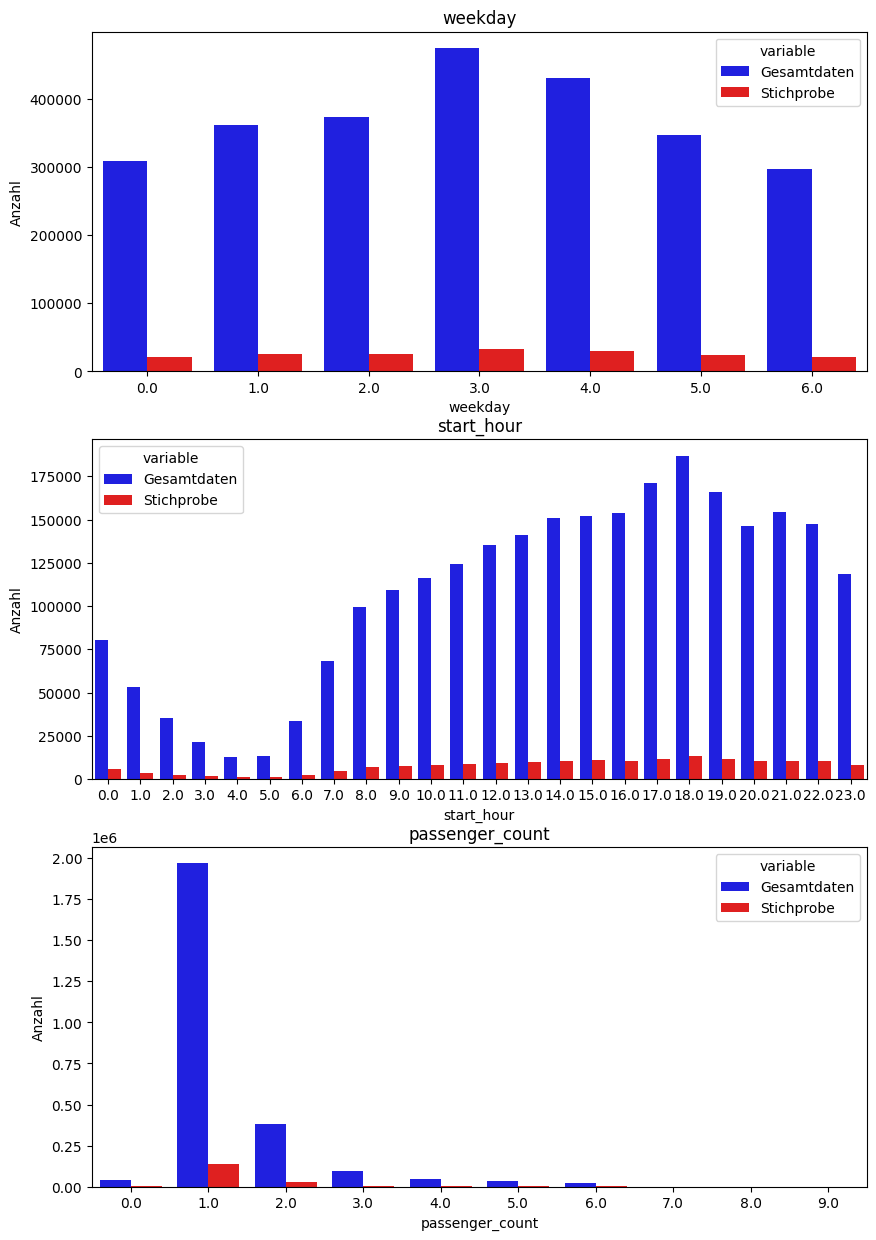

In [18]:
categorical_features = ['weekday', 'start_hour', 'passenger_count']

# Anzahl der benötigten Reihen
rows = len(categorical_features)
_, axes = plt.subplots(rows, 1, figsize=(10, 5 * rows))

# Anzeigen Countplots
for i, feature in enumerate(categorical_features):
    combined_data = pd.concat([data[feature], sampled_data[feature]], axis=1)
    combined_data.columns = ['Gesamtdaten', 'Stichprobe']
    sns.countplot(data=pd.melt(combined_data), x='value', hue='variable', ax=axes[i], palette=['blue', 'red'])
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Anzahl')
plt.show()

<h3>Bereinigung der Daten:</h3> 

Es ist zu erkennen das folgende Daten bereinigt werden müsse:
- negativen Werte (travel_time, tip_amount, total_amount_without_tip)
- Ausreißer

In [19]:
max_data = sampled_data.nlargest(5, 'travel_time')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
136430,86343.00,23,23,4,1.00,1.94,186,211,0.00,19.90
104455,86330.00,17,11,5,1.00,10.45,163,138,8.52,56.80
20240,86328.00,4,14,6,6.00,0.89,237,236,1.47,14.70
58535,86328.00,10,13,5,1.00,0.00,239,43,1.19,11.90
175082,86322.00,29,15,3,2.00,2.12,140,43,4.34,21.70


Die Ausreißer für die Fahrtzeiten sind extrem groß. Daher nehmen wir den maximal Wert von 5 Stunden (18000 Sekunden) an und löschen alle größeren Einträge.

In [20]:
max_data = sampled_data.nlargest(5, 'trip_distance')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
82473,2771.00,14,19,2,1.00,9683.79,132,181,20.30,103.25
97823,1831.00,16,15,4,1.00,9676.28,48,87,4.00,36.40
82215,3103.00,14,15,2,1.00,9675.31,79,13,8.82,44.10
10561,715.00,2,19,4,1.00,9674.61,239,229,4.00,20.00
82427,1135.00,14,15,2,1.00,9674.61,68,50,4.20,21.00


Die Ausreißer für die Fahrtdistanzen sind extrem groß. Daher nehmen wir den maximal Wert von 200 Meilen an und löschen alle größeren Einträge.

In [21]:
max_data = sampled_data.nlargest(5, 'tip_amount')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
30445,1189.00,5,10,0,1.00,3.29,158,162,220.00,23.80
85141,3696.00,14,23,2,0.00,16.40,79,215,155.55,76.60
124674,1646.00,21,23,2,3.00,19.30,132,265,130.00,117.15
39960,3504.00,7,15,2,5.00,11.02,138,231,112.00,69.75
43468,919.00,7,15,2,0.00,1.50,74,262,111.14,80.55


Die Ausreißer für Trinkgelder sind können groß sein. Daher nehmen wir den maximal Wert von 100 Dollar an und löschen alle größeren Einträge.

In [22]:
max_data = sampled_data.nlargest(5, 'total_amount_without_tip')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
68863,5679.00,11,10,6,1.00,63.40,132,265,107.40,537.05
172234,8.00,29,13,3,1.00,0.01,265,265,0.00,491.00
87879,5333.00,14,19,2,1.00,64.93,138,265,20.00,452.00
104589,2.00,17,22,5,1.00,0.00,265,265,40.00,401.50
116842,33.00,19,20,0,1.00,0.00,148,148,0.00,393.50


Die Ausreißer für zu bezahlenden Beträge können groß sein. Daher nehmen wir den maximal Wert von 500 Dollar an und löschen alle größeren Einträge.

In [23]:
cleaned_data = sampled_data.copy()
for index, row in sampled_data.iterrows():
    if (row < 0).any() or \
       row['travel_time'] > 18000 or \
       row['trip_distance'] > 200 or \
       row['tip_amount'] > 100 or \
       row['total_amount_without_tip'] > 500:
        cleaned_data.drop(index, inplace=True)

print(f"Anzahl Datensätze in der Stichprobe: {len(cleaned_data)}")

Anzahl Datensätze in der Stichprobe: 181281


<h1>Lieare Regression:</h1>

Im folgenden gucken wir uns die daten mit Linearer Regression an und gucken uns vergleichen die Werte mit einer Korellationsmatrix.

In [56]:
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
y = cleaned_data['tip_amount']

for feature in features:
    X = cleaned_data[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)
    model_sm = sm.OLS(y_train, X_train_sm).fit()
    y_pred_sm = model_sm.predict(X_test_sm)
    p_value = model_sm.pvalues.iloc[1]  # Der p-Wert des Merkmals
    
    # Bewertung
    mse = mean_squared_error(y_test, y_pred_sm)
    r2 = r2_score(y_test, y_pred_sm)
    
    print(f"Feature: {feature}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print(f"Koeffizient: {model_sm.params.iloc[1]}")
    print(f"Intercept: {model_sm.params.iloc[0]}")
    print(f"P-Value: {p_value:.5f}\n")

Feature: travel_time
Mean Squared Error (MSE): 10.41
R^2 Score: 0.41
Koeffizient: 0.003304346008855926
Intercept: 1.1558871293310102
P-Value: 0.00000

Feature: start_hour
Mean Squared Error (MSE): 17.62
R^2 Score: 0.00
Koeffizient: 0.010731808309550029
Intercept: 4.294860031738304
P-Value: 0.00000

Feature: weekday
Mean Squared Error (MSE): 17.62
R^2 Score: -0.00
Koeffizient: -0.023765244638834233
Intercept: 4.519801167583005
P-Value: 0.00005

Feature: passenger_count
Mean Squared Error (MSE): 17.61
R^2 Score: 0.00
Koeffizient: 0.15757434562597575
Intercept: 4.235233494721126
P-Value: 0.00000

Feature: trip_distance
Mean Squared Error (MSE): 8.51
R^2 Score: 0.52
Koeffizient: 0.6513521914251471
Intercept: 2.1322954476941183
P-Value: 0.00000

Feature: total_amount_without_tip
Mean Squared Error (MSE): 7.21
R^2 Score: 0.59
Koeffizient: 0.155464287618564
Intercept: 0.43927962598388415
P-Value: 0.00000



<b>Ergebnis:</b> </br> 
Die wichtigsten Prädiktoren für die Trinkgeldhöhe sind die Fahrtstrecke und der Gesamtbetrag ohne Trinkgeld, da sie die meiste Varianz erklären und starke, signifikante Einflüsse haben. Die Reisedauer hat einen moderaten Einfluss. Andere Merkmale wie Startzeit, Wochentag und Anzahl der Passagiere sind statistisch signifikant, aber praktisch irrelevant.

<b>Linearer Vergleich des Trinkgeldes:</b>

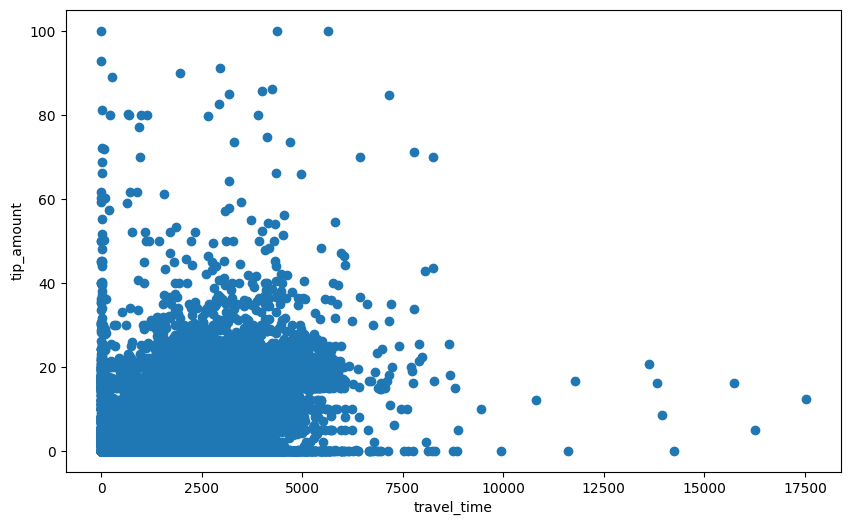

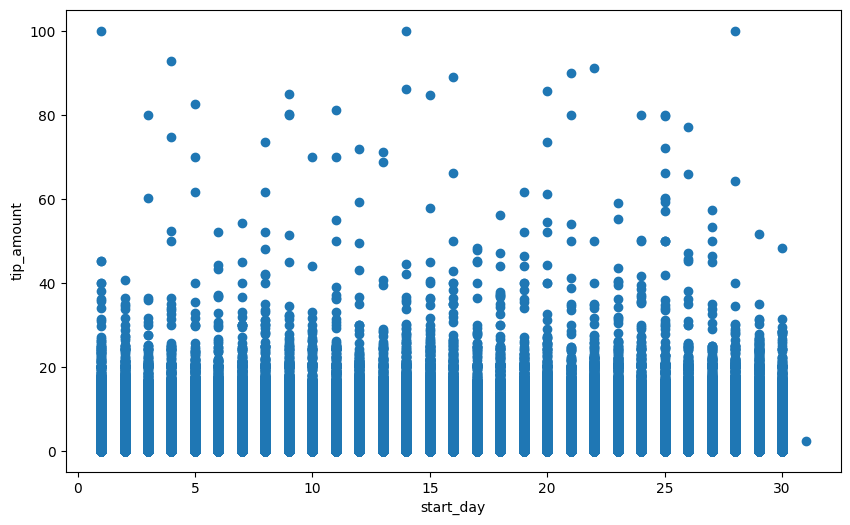

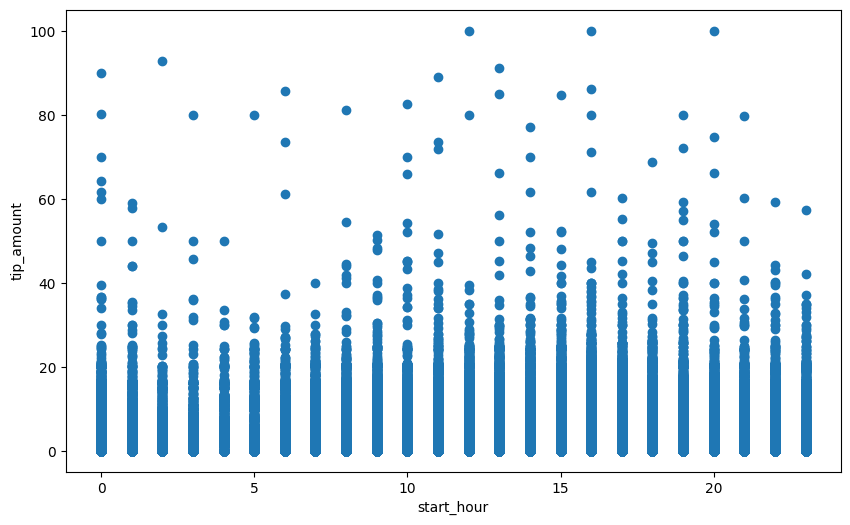

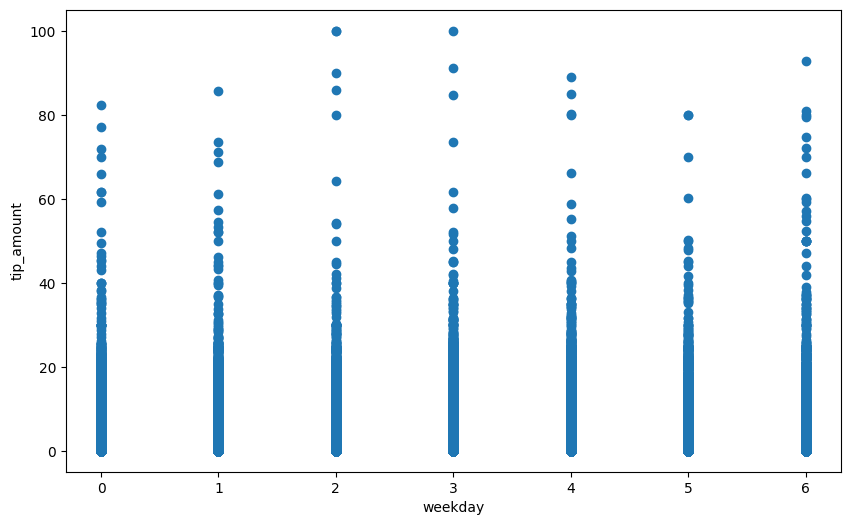

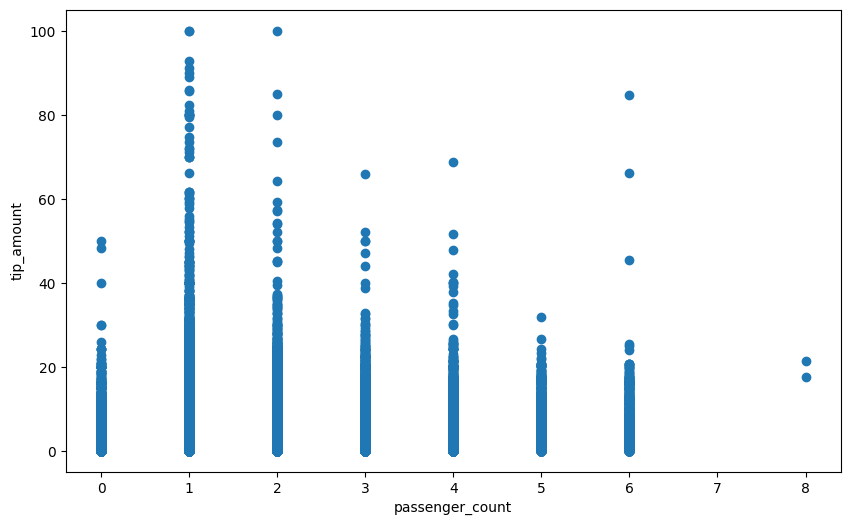

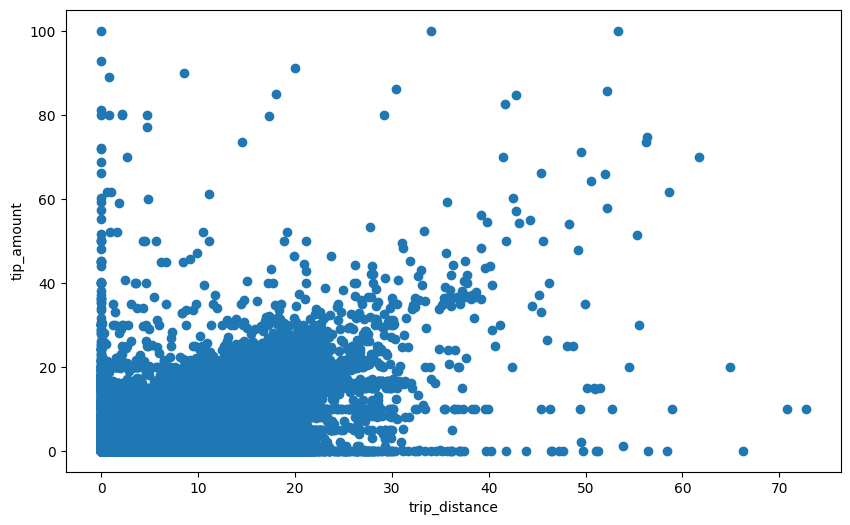

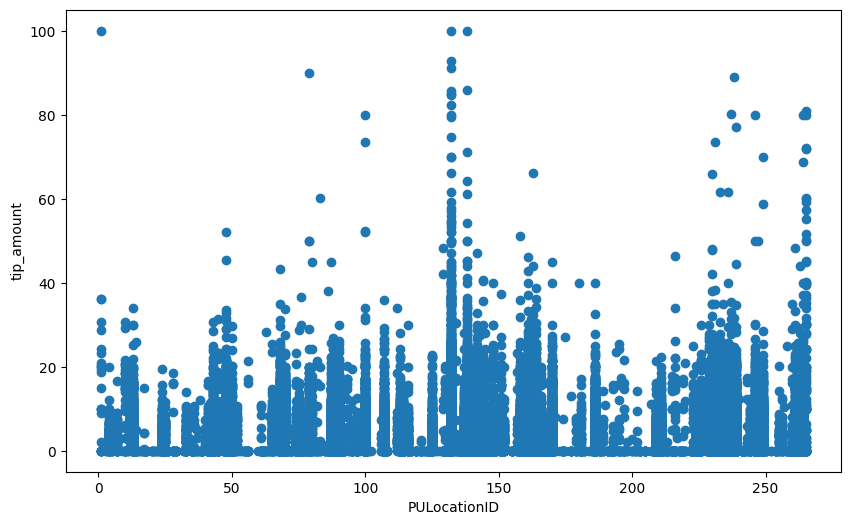

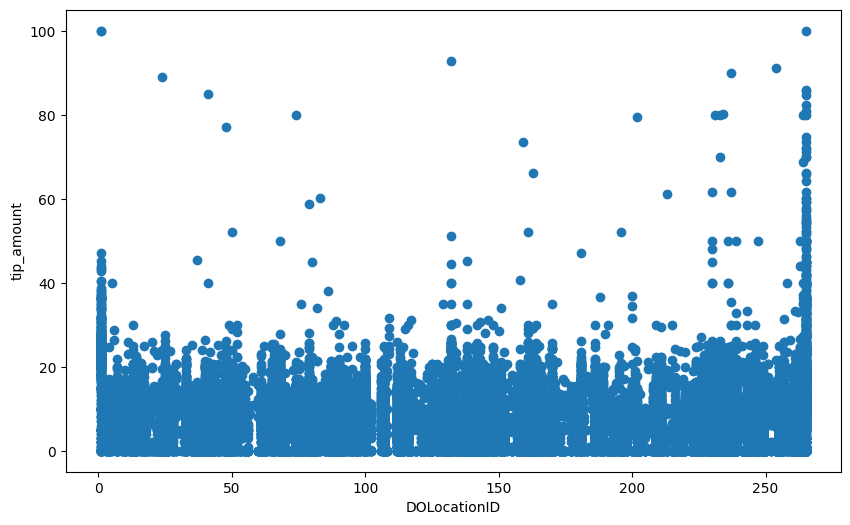

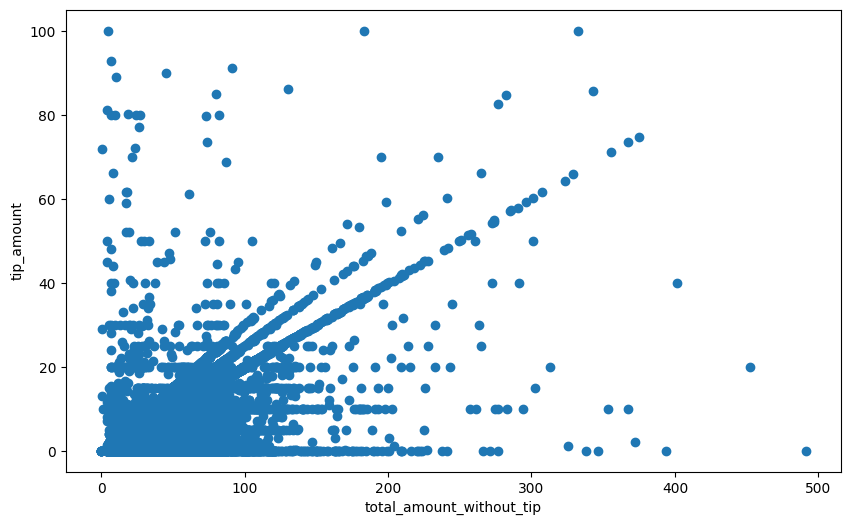

In [81]:
for label in cleaned_data.columns:
    if label != 'tip_amount':  #vergleicht alles Werte außer Trinkgeld
        plt.figure(figsize=(10, 6))
        plt.scatter(cleaned_data[label], cleaned_data['tip_amount'])
        plt.ylabel("tip_amount")
        plt.xlabel(label)
        plt.show()

<b>Ergebnis:</b> <br>
<b>Start_Day:</b> Es sind leichte konkave und konvexe Kurven zu erkennen die sich auf Wochen zurück schließen lassen. Könnte auf das Wöchentliche Gehalt zurück führen sein welches die New Yorker bekommen.<br>
<b>Start_hour:</b> Minimale steigung des Trinkgeldes zum Abend hin zu erkenen.<br>
<b>Tip_amount:</b> Es ist zu erkennen das vermehrt einzelne Personen mehr Trinkgeld geben.<br>
<b>PULocationID:</b> Bei dem Startort lässt sich Ausreißer erkennen.<br>
<b>DOLocationID:</b> Beim Zielort lassen sich 2 Ausreißer erkennen.<br>
<b>Total_amount_without_tip:</b> Lässt sich starke Korellation erkennen.<br>

<h1>Korrelation der Daten:</h1>

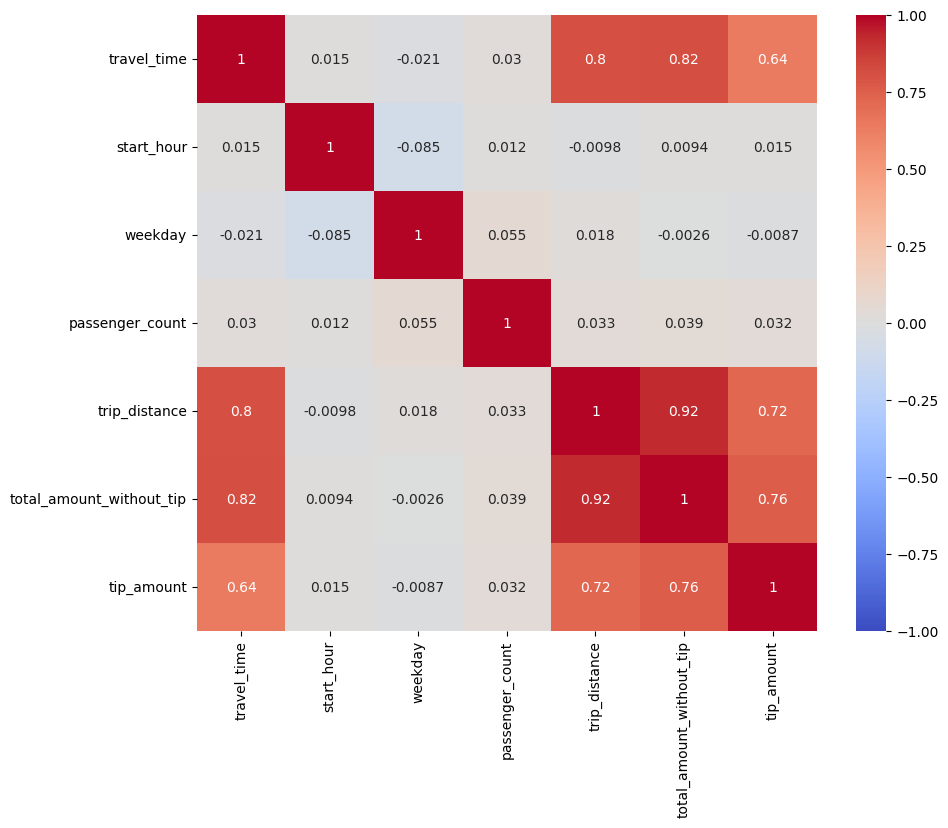

In [39]:
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip', 'tip_amount']
correlation_matrix = cleaned_data[features].corr()

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

<h1>Lineare Multiple Regression:</h1>

In [77]:
#Aufteilung
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
X = cleaned_data[features]
y = cleaned_data['tip_amount']

#Ausführung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # Vorhersagen auf dem Testset durchführen
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 7.59


In [78]:
coefficients = model.coef_
intercept = model.intercept_

# Berechnung der p-Werte
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
p_values = est2.pvalues

# Ergebnisse anzeigen
print(f"F-Statistic: {est2.fvalue}, p-value: {est2.f_pvalue}")
print(f"Multiple R-squared: {est2.rsquared}, Adjusted R-squared: {est2.rsquared_adj}")
print("\nKoeffizienten und P-Werte:")
for feature, coef, p_val in zip(features, coefficients, p_values[1:]):
    print(f"{feature:30}\tCoef={coef:.6f}\tP-Value={p_val:.6e}")

F-Statistic: 34144.5686157683, p-value: 0.0
Multiple R-squared: 0.5855288342294728, Adjusted R-squared: 0.5855116857089915

Koeffizienten und P-Werte:
travel_time                   	Coef=0.000183	P-Value=4.061411e-32
start_hour                    	Coef=0.006343	P-Value=1.157625e-07
weekday                       	Coef=-0.018674	P-Value=8.533007e-07
passenger_count               	Coef=0.018896	P-Value=1.847384e-02
trip_distance                 	Coef=0.086656	P-Value=1.304857e-99
total_amount_without_tip      	Coef=0.131561	P-Value=0.000000e+00


<b>Ergebnis:</b> </br>
Der Mean Squared Error (MSE) von 7,22 weist auf eine akzeptable Modellgenauigkeit hin. Ein R²-Wert von 0,59 zeigt, dass 59 % der Variabilität im Trinkgeld durch die Prädiktoren erklärt werden können. Die signifikanten p-Werte für <b>travel_time, start_hour, trip_distance und total_amount_without_tip </b> deuten darauf hin, dass diese Variablen einen wesentlichen Einfluss auf die Höhe des Trinkgeldes haben. <br>
-Höchter Korrelationswert bei <b>total_amount_without_tip</b>

<h1>Random Forest:</h1> 

In [74]:
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
X = cleaned_data[features]
y = cleaned_data['tip_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Bewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 7.59
R^2 Score: 0.57


In [75]:
# Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                    Feature  Importance
5  total_amount_without_tip        0.66
0               travel_time        0.12
4             trip_distance        0.11
1                start_hour        0.06
2                   weekday        0.04
3           passenger_count        0.02
